# Machine Learning Project 

# The objective is to train  linear regression and ridge regression model on the Boston Housing Dataset and compare the accuracies of the two models

In [2]:
#Importing necessary libraries for data retrieval, manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/ssagn/Desktop/Boston Housing.csv")

room = data['rm']
medval = data['medv']

<AxesSubplot:>

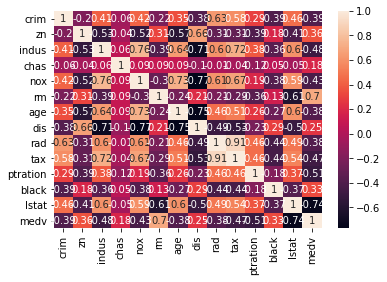

In [3]:
import seaborn as sns

correlation_matrix = data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

In [2]:
#Defining functions to model the working of Linear Regression

def regression_line(x, y):

    x_mean = x.mean()
    y_mean = y.mean()
    
    b1 = ((((x - x_mean) * (y - y_mean)).sum()) / ((x - x_mean)**2).sum())
    
    b0 = y_mean - (b1 * x_mean)
    
    reg_line = "y = {} + {}β".format(b0, round(b1, 3))
    
    return (b0, b1, reg_line)

def coefficient(x, y):
    n = len(x)
    
    num = (n * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((n * (x**2).sum() - x.sum()**2) * (n * (y**2).sum() - y.sum()**2))
    
    r = num / den
    
    return r

B0, B1, reg_line = regression_line(room, medval)
R = coefficient(room, medval)

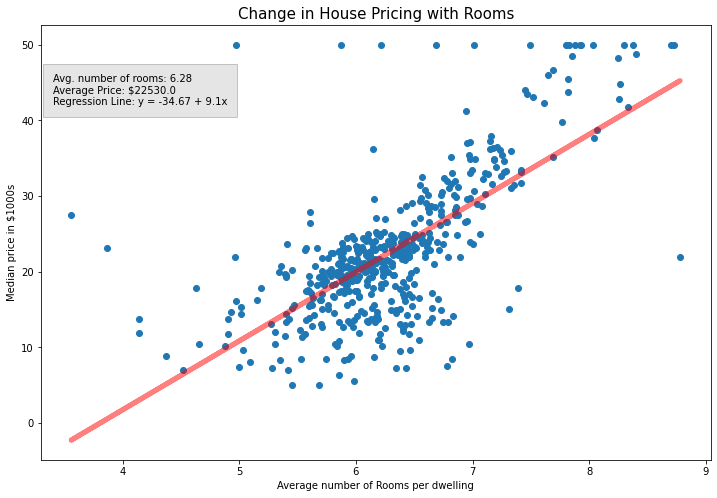

In [3]:
#Data Visualization for mathematical linear regression

plt.figure(figsize = (12,8))

text = """Avg. number of rooms: {}
Average Price: ${}
Regression Line: y = {} + {}x""".format(round(room.mean(), 2),
                                        round(medval.mean(), 2)*1000,
                                        round(B0, 2),
                                        round(B1, 2))

plt.scatter(room, medval, linewidth = 1)
plt.text(x =3.4, y = 42, s = text, fontsize = 10, bbox = {'facecolor' : "grey", 'alpha' : 0.2, 'pad': 10})
plt.plot(room, B0 + B1*room, color = "red", linewidth = 5, alpha = 0.5 )
plt.xlabel("Average number of Rooms per dwelling")
plt.ylabel("Median price in $1000s")

plt.title("Change in House Pricing with Rooms", fontsize = 15)
plt.show()

In [4]:
#Separating data into training and testing sets for the regression models

x = data[['rm']]
y = data[['medv']]

from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Importing the Linear regression model and training it with the training data set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Measuring the performance of the model on testing data with relevant statistics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
y_pred = regressor.predict(X_test)

linear_metrics = [r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred), np.sqrt(mean_squared_error(Y_test, y_pred))]

print("""R2 Score for Linear Regression: {}
Mean Absolute Error (MAE) for Linear Regression: {}
Root Mean Square Error(RMSE) for Linear Regression: {}""".format(round(linear_metrics[0], 3), round(linear_metrics[1], 3), round(linear_metrics[2], 3)))

R2 Score for Linear Regression: 0.424
Mean Absolute Error (MAE) for Linear Regression: 4.325
Root Mean Square Error(RMSE) for Linear Regression: 6.849


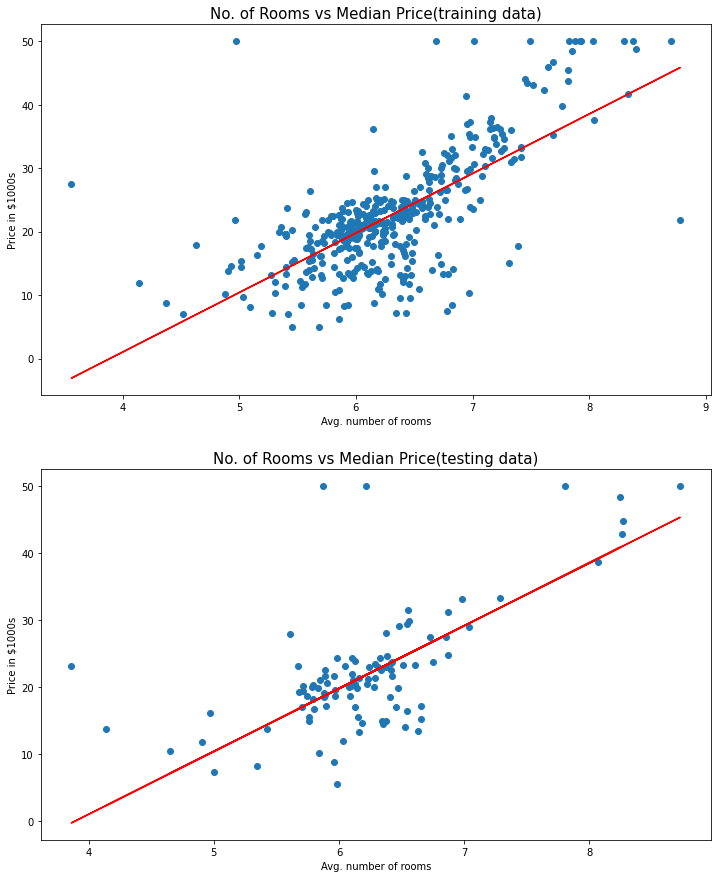

In [5]:
#Data visualization of the performance of the model on training and testing data

plt.figure(figsize = (12,15))
plt.subplot(211)
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title("No. of Rooms vs Median Price(training data)", fontsize = 15)
plt.xlabel("Avg. number of rooms")
plt.ylabel("Price in $1000s")

plt.subplot(212)
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.title("No. of Rooms vs Median Price(testing data)", fontsize = 15)
plt.xlabel("Avg. number of rooms")
plt.ylabel("Price in $1000s")

plt.show()

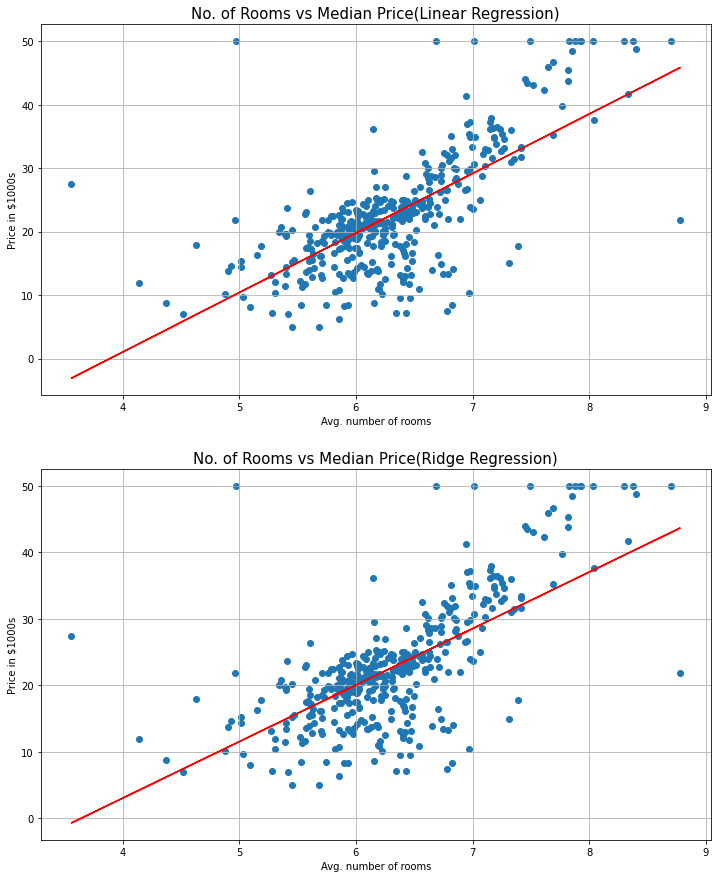

In [6]:
#Importing and training the ridge regression model on training data

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 20)
ridge.fit(X_train, Y_train)
    
#Data visualization of the difference between linear regression
#and ridge regression at an arbitrary alpha
    
plt.figure(figsize = (12,15))
plt.subplot(211)
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title("No. of Rooms vs Median Price(Linear Regression)", fontsize = 15)
plt.xlabel("Avg. number of rooms")
plt.ylabel("Price in $1000s")
plt.grid(True)

plt.subplot(212)
plt.scatter(X_train, Y_train)
plt.plot(X_train, ridge.predict(X_train), color = 'red')
plt.title("No. of Rooms vs Median Price(Ridge Regression)", fontsize = 15)
plt.xlabel("Avg. number of rooms")
plt.ylabel("Price in $1000s")
plt.grid(True)

plt.show()   

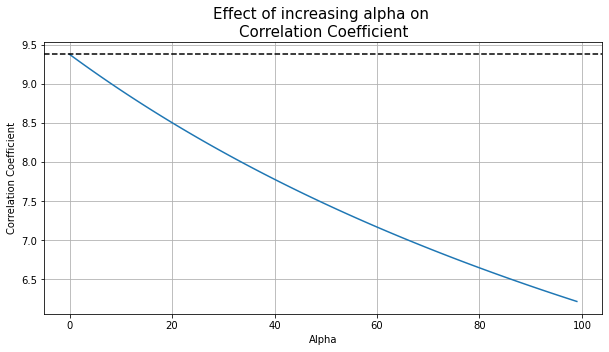

In [21]:
#Fitting the training data into the model with a range of alpha values and recording the results

alphas = np.arange(0,100, 1)

ridge_r2 = []
ridge_MAE = []
ridge_RMSE = []
ridge_coefficients = []
for alpha in alphas:
    ridge.set_params(alpha = alpha)
    ridge.fit(X_train, Y_train)
    
    r_pred = ridge.predict(X_test)
    ridge_r2.append(r2_score(Y_test, r_pred))
    ridge_MAE.append(mean_absolute_error(Y_test, r_pred))
    ridge_RMSE.append(np.sqrt(mean_squared_error(Y_test, r_pred)))
    ridge_coefficients.append(ridge.coef_[0])

    
#Data visualization of how correlation coefficient changes with alpha value

plt.figure(figsize = (10,5))
plt.plot(alphas, ridge_coefficients)
plt.title("Effect of increasing alpha on \nCorrelation Coefficient", fontsize = 15)
plt.xlabel("Alpha")
plt.ylabel("Correlation Coefficient")
plt.axhline(y = regressor.coef_, color = "black", linestyle = "--")
plt.grid(True)

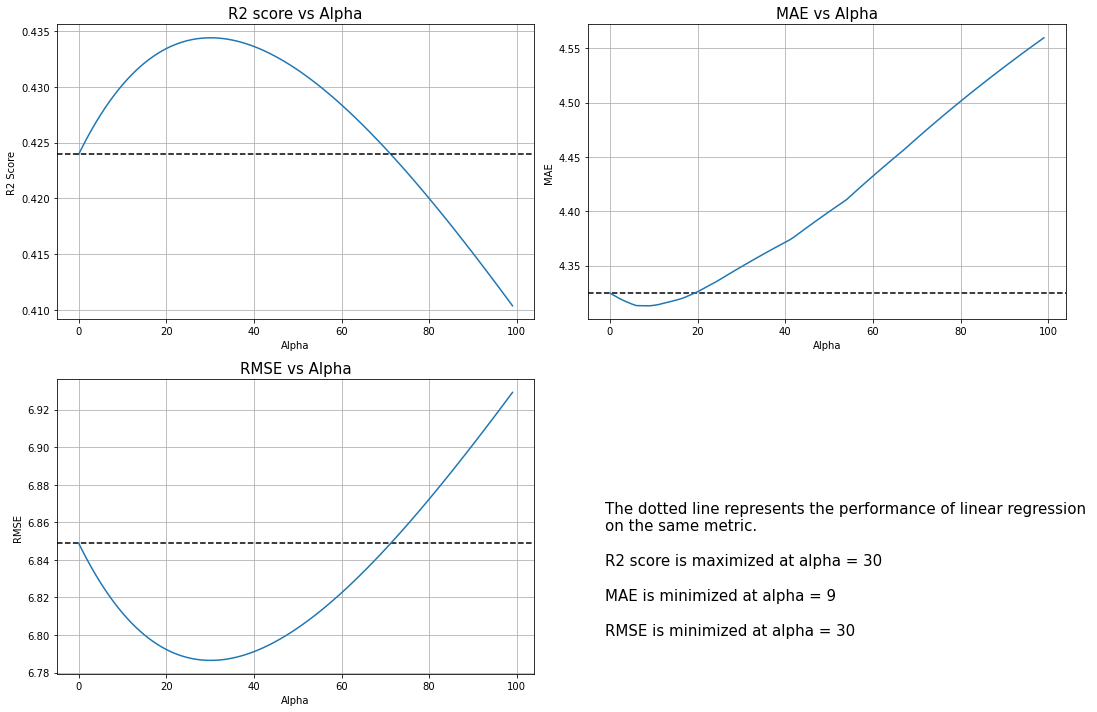

In [22]:
#Data visulaization of the performance of the ridge regression model
#in a range of different alphas 

fig = plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.plot(alphas, ridge_r2)
plt.title("R2 score vs Alpha", fontsize = 15)
plt.axhline(y = linear_metrics[0], color = "black", linestyle = "--")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.grid(True)

plt.subplot(2,2,2)
plt.title("MAE vs Alpha", fontsize = 15)
plt.axhline(y = linear_metrics[1], color = "black", linestyle = "--")
plt.plot(alphas, ridge_MAE)
plt.xlabel("Alpha")
plt.ylabel("MAE ")
plt.grid(True)

plt.subplot(2,2,3)
plt.title("RMSE vs Alpha", fontsize = 15)
plt.axhline(y = linear_metrics[2], color = "black", linestyle = "--")
plt.plot(alphas, ridge_RMSE)
plt.xlabel("Alpha")
plt.ylabel("RMSE ")
plt.grid(True)

fig.tight_layout()

#Displaying the best performing values for alpha

plt.text(x = 120, y = 6.8, s = f"""The dotted line represents the performance of linear regression 
on the same metric.

R2 score is maximized at alpha = {alphas[ridge_r2.index(max(ridge_r2))]}

MAE is minimized at alpha = {alphas[ridge_MAE.index(min(ridge_MAE))]}

RMSE is minimized at alpha = {alphas[ridge_RMSE.index(min(ridge_RMSE))]}""", fontsize = 15)

plt.show()

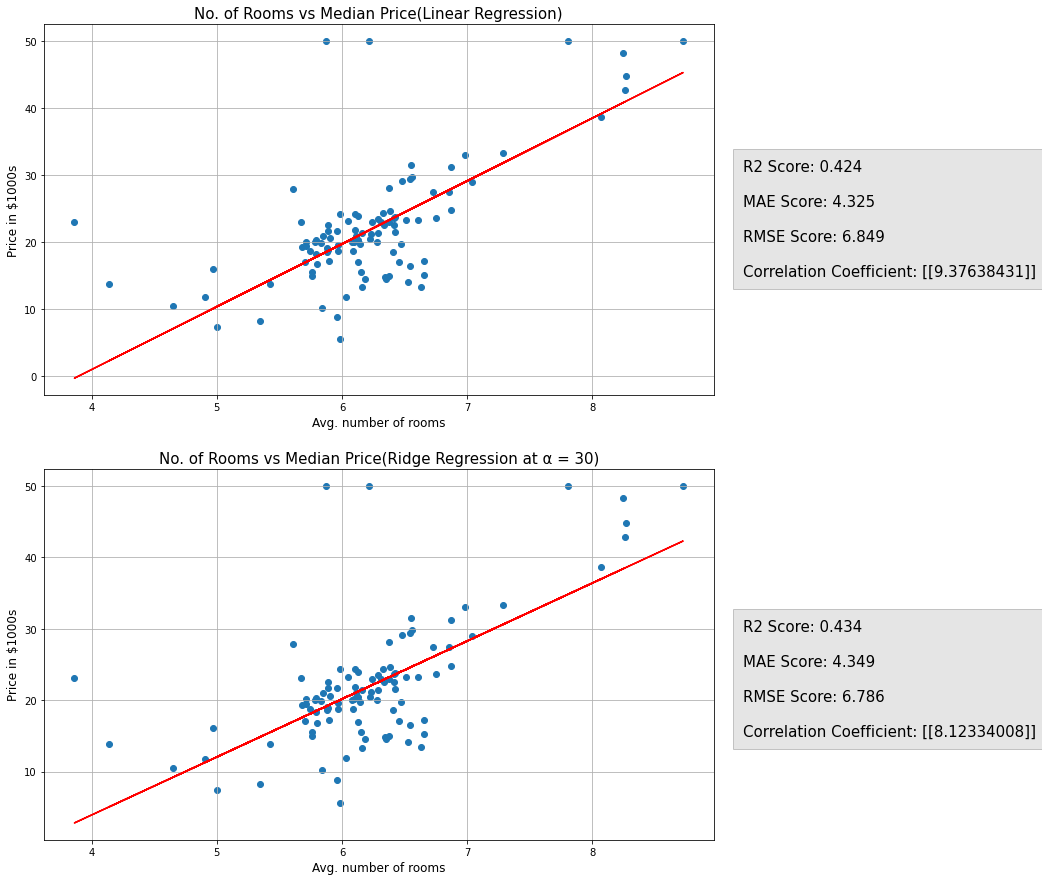

In [9]:
#Final Comparison between Algorithms
#with performance of linear regression vs performance of best performing ridge regression model

ridge = Ridge(30)
ridge.fit(X_train, Y_train)

plt.figure(figsize = (12,15))
plt.subplot(211)
plt.scatter(X_test, Y_test)
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.title("No. of Rooms vs Median Price(Linear Regression)", fontsize = 15)
plt.xlabel("Avg. number of rooms", fontsize = 12)
plt.ylabel("Price in $1000s", fontsize = 12)
plt.grid(True)
plt.text(x = 9.2, y = 15, s = f"""R2 Score: {round(linear_metrics[0],3)}
\nMAE Score: {round(linear_metrics[1], 3)}
\nRMSE Score: {round(linear_metrics[2],3)}
\nCorrelation Coefficient: {regressor.coef_}""", fontsize = 15, bbox = {'facecolor' : "grey", 'alpha' : 0.2, 'pad': 10})

plt.subplot(212)
plt.scatter(X_test, Y_test)
plt.plot(X_test, ridge.predict(X_test), color = 'red')
plt.title("No. of Rooms vs Median Price(Ridge Regression at α = 30)", fontsize = 15)
plt.xlabel("Avg. number of rooms", fontsize = 12)
plt.ylabel("Price in $1000s", fontsize = 12)
plt.grid(True)
plt.text(x = 9.2, y = 15, s = f"""R2 Score: {round(ridge_r2[30],3)}
\nMAE Score: {round(ridge_MAE[30], 3)}
\nRMSE Score: {round(ridge_RMSE[30],3)}
\nCorrelation Coefficient: {ridge.coef_}""", fontsize = 15, bbox = {'facecolor' : "grey", 'alpha' : 0.2, 'pad': 10})

plt.show()   

# Conclusion:

## We can see that Ridge regression at a given α improves on all of the accuracy metrics

## This is because ridge regression introduces a bias into the cost optimization function

## Since the house prices in the boston housing dataset have a high variance

## introducing a bias into the model increases the accuracy of the predictions